# Restaurants and Attractions in Popular Destinations

## Abstract
This project aims at creating a database which gives us details about Restaurants and Attractions in popular destinations. This project aims at showcasing our knowledge in Database Normalization (1NF, 2NF & 3NF). Through normalization we are able to reduce redundancy in the data as well as allow for smooth data updation, insertion and deletion. We have extracted 2 forms of data by reading csv, Cities and Restaurants. Cities dataset contains details about the city and attractions found in the city. Restaurants dataset contains details about the restaurant including the cuisines served, ratings and price range. The Restaurant dataset has been reduced to 2nd Normal Form and Cities dataset has been reduced to 3rd Normal form.

## Data imported:
    places.csv
    restaurants.csv

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from itertools import chain

### Reading cities dataset

In [92]:
Cities = pd.read_csv("C:/Users/Arjun/Documents/NEU/DMDD/Assignment 2/Source/places.csv",encoding = 'unicode_escape')

In [ ]:
Cities = Cities[['place_name','place_country','place_maps','place_desc','place_att','place_airport']]

In [94]:
Cities.head()

,place_name,place_country,place_maps,place_desc,place_att,place_airport
0,Amsterdam,Netherlands,"https://maps.google.com/?q=Amsterdam,+Netherla...",Amsterdam â A city rich with heritage and ri...,"['Amsterdam Free Walking Tour','Heineken Exper...",Amsterdam Schiphol (AMS) Airport
1,Barcelona,Spain,"https://maps.google.com/?q=Barcelona,+Spain&ft...",Barcelona â dive into the Catalan creativity...,"['Las Ramblas','Sagrada Família','Casa Batlló'...",Josep Tarradellas Barcelona-El Prat Airport
2,Berlin,Germany,"https://maps.google.com/?q=Berlin,+Germany&fti...",Berlin â Germanyâs capital city has had a ...,"['Brandenburg Gate','Reichstag','Tiergarten','...",Berlin Tegel
3,Budapest,Hungary,"https://maps.google.com/?q=Budapest,+Hungary&f...",https://www.expedia.com/Budapest.d179994.Desti...,"['Parliament Building','Gellért Baths','Heroes...",Budapest (BUD) Airport
4,Copenhagen,Denmark,"https://maps.google.com/?q=Copenhagen,+Denmark...",http://www.expedia.com.my/Copenhagen.d178252.T...,"['Tivoli Gardens','Little mermaid statue','Str...",Bornholm Airport


The above data sample of cities dataset shows that the place_att column which holds the top 10 attractions in each place listed in the dataframe. It can be seen that all 10 attractions are in the same cell. 1st Normal Form principles need to be applied here.

In [44]:
city_df = pd.DataFrame(Cities.place_att.str.split(",").tolist(), index=Cities.place_name).stack()
city_df = city_df.reset_index([0, 'place_name'])
city_df.columns = ['place_name', 'place_atts']
city_df['place_atts'] = city_df['place_atts'].str.replace('[','').str.replace(']','').str.replace("'","")
Cities = Cities.merge(city_df, left_on = 'place_name', right_on = 'place_name')
Cities = Cities[['place_name','place_country','place_maps','place_desc','place_atts','place_airport']]
Cities.head()

,place_name,place_country,place_maps,place_desc,place_atts,place_airport
0,Amsterdam,Netherlands,"https://maps.google.com/?q=Amsterdam,+Netherla...",Amsterdam â A city rich with heritage and ri...,Amsterdam Free Walking Tour,Amsterdam Schiphol (AMS) Airport
1,Amsterdam,Netherlands,"https://maps.google.com/?q=Amsterdam,+Netherla...",Amsterdam â A city rich with heritage and ri...,Heineken Experience,Amsterdam Schiphol (AMS) Airport
2,Amsterdam,Netherlands,"https://maps.google.com/?q=Amsterdam,+Netherla...",Amsterdam â A city rich with heritage and ri...,75-Minute Water Colors Cruise,Amsterdam Schiphol (AMS) Airport
3,Amsterdam,Netherlands,"https://maps.google.com/?q=Amsterdam,+Netherla...",Amsterdam â A city rich with heritage and ri...,Van Gogh Museum Ticket,Amsterdam Schiphol (AMS) Airport
4,Amsterdam,Netherlands,"https://maps.google.com/?q=Amsterdam,+Netherla...",Amsterdam â A city rich with heritage and ri...,Johan Cruijff ArenA Stadium 75-Minute Tour,Amsterdam Schiphol (AMS) Airport


1NF operations were applied and it can be observed that the place_att column is now holding atomic values. We need to now conduct 2NF operations. Attraction details can be split into a new dataframe and additional information about the attractions can be added. 

In [45]:
Attraction = Cities[['place_atts','place_name']]
Attraction = Attraction.rename(columns={'place_atts':'att_name'})
Attraction['att_id'] = Attraction.index
Attraction = Attraction[['att_id','att_name','place_name']]
price_list = ['$','$$','$$$','$$$$','Free']
Attraction['att_cost'] = np.random.choice(price_list,size=len(Attraction))
Attraction.head()

,att_id,att_name,place_name,att_cost
0,0,Amsterdam Free Walking Tour,Amsterdam,$$
1,1,Heineken Experience,Amsterdam,Free
2,2,75-Minute Water Colors Cruise,Amsterdam,Free
3,3,Van Gogh Museum Ticket,Amsterdam,$$$
4,4,Johan Cruijff ArenA Stadium 75-Minute Tour,Amsterdam,$


In [95]:
Cities = Cities[['place_name','place_country','place_maps','place_desc','place_airport']]
Cities = Cities.drop_duplicates()

Since we have separated the Attraction details from the cities dataframe, we need to restructure the cities dataframe and remove the attractions from it in order to avoid redunduncy. We are conducting 2NF on the Cities data as well. 

In [41]:
Cities.head()

,place_name,place_country,place_maps,place_desc,place_airport
0,Amsterdam,Netherlands,"https://maps.google.com/?q=Amsterdam,+Netherla...",Amsterdam â A city rich with heritage and ri...,Amsterdam Schiphol (AMS) Airport
10,Barcelona,Spain,"https://maps.google.com/?q=Barcelona,+Spain&ft...",Barcelona â dive into the Catalan creativity...,Josep Tarradellas Barcelona-El Prat Airport
20,Berlin,Germany,"https://maps.google.com/?q=Berlin,+Germany&fti...",Berlin â Germanyâs capital city has had a ...,Berlin Tegel
30,Budapest,Hungary,"https://maps.google.com/?q=Budapest,+Hungary&f...",https://www.expedia.com/Budapest.d179994.Desti...,Budapest (BUD) Airport
40,Copenhagen,Denmark,"https://maps.google.com/?q=Copenhagen,+Denmark...",http://www.expedia.com.my/Copenhagen.d178252.T...,Bornholm Airport


It can be noticed that in the Attraction dataframe, the cost attribute is something that can change. In order to introduce flexibility in changing the cost without affecting other attraction details, we did a 3NF transformation dividing the dataframe into 2. One containing the attraction details and the other the attraction costs.

In [47]:
Attraction_Details = Attraction[['att_id','att_name','place_name']]
Attraction_Details.head()

,att_id,att_name,place_name
0,0,Amsterdam Free Walking Tour,Amsterdam
1,1,Heineken Experience,Amsterdam
2,2,75-Minute Water Colors Cruise,Amsterdam
3,3,Van Gogh Museum Ticket,Amsterdam
4,4,Johan Cruijff ArenA Stadium 75-Minute Tour,Amsterdam


In [48]:
Attraction_Cost = Attraction[['att_id','att_cost']]
Attraction_Cost.head()

,att_id,att_cost
0,0,$$
1,1,Free
2,2,Free
3,3,$$$
4,4,$


### Reading the Restaurants dataset

In [75]:
Restaurant = pd.read_csv("C:/Users/Arjun/Documents/NEU/DMDD/Assignment 2/Source/restaurants.csv", encoding = 'unicode_escape')

In [76]:
Restaurant = Restaurant[['res_name','res_place_name','res_cuisine','res_rating','res_price']]
Restaurant.head()

,res_name,res_place_name,res_cuisine,res_rating,res_price
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",5.0,$$$
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,$$$$
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,$$$$
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,$$$$
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,$$$$


res_cuisine column in the above dataframe has multiple values in a single cell. Before doing 1NF operations, we conducted operations to fix the NaN values in the dataframe. We replaced some of the NaN values in the cuisine column and dropped any additional Na values in the dataframe. 

In [77]:
Restaurant['res_cuisine'] = Restaurant['res_cuisine'].fillna("['Gourmet']")
Restaurant['res_id'] = Restaurant.index + 1
Restaurant = Restaurant[['res_id','res_name','res_place_name','res_cuisine','res_rating','res_price']]
Restaurant = Restaurant.dropna()
Restaurant['res_cuisine']

0                          ['French', 'Dutch', 'European']
1        ['Dutch', 'European', 'Vegetarian Friendly', '...
2        ['Mediterranean', 'French', 'International', '...
3        ['French', 'European', 'International', 'Conte...
4        ['Dutch', 'European', 'International', 'Vegeta...
                               ...                        
88864                                          ['Gourmet']
88865                                             ['Cafe']
88866                                          ['Gourmet']
88867                                        ['Fast Food']
88868       ['Italian', 'Pizza', 'Mediterranean', 'Diner']
Name: res_cuisine, Length: 88869, dtype: object

Below are the operations for the 1NF transformation.

In [78]:
new_df = pd.DataFrame(Restaurant.res_cuisine.str.split(",").tolist(), index=Restaurant.res_id).stack()
new_df = new_df.reset_index([0, 'res_id'])
new_df.columns = ['res_id', 'res_cuisines']
new_df
new_df['res_cuisines'] = new_df['res_cuisines'].str.replace('[','').str.replace(']','').str.replace("'","")
new_df
Restaurant = Restaurant.merge(new_df, left_on = 'res_id', right_on = 'res_id')
Restaurant = Restaurant[['res_id','res_name','res_place_name','res_cuisines','res_rating','res_price']]

In [79]:
Restaurant.isna().sum()

res_id            0
res_name          0
res_place_name    0
res_cuisines      0
res_rating        0
res_price         0
dtype: int64

In [80]:
Restaurant.head()

,res_id,res_name,res_place_name,res_cuisines,res_rating,res_price
0,1,Martine of Martine's Table,Amsterdam,French,5.0,$$$
1,1,Martine of Martine's Table,Amsterdam,Dutch,5.0,$$$
2,1,Martine of Martine's Table,Amsterdam,European,5.0,$$$
3,2,De Silveren Spiegel,Amsterdam,Dutch,4.5,$$$$
4,2,De Silveren Spiegel,Amsterdam,European,4.5,$$$$


2NF operations have been undertaken in order to separate the cuisine information from restaurant information. 

In [81]:
Cuisine = Restaurant[['res_cuisines','res_id']]
Cuisine = Cuisine.rename(columns={'res_cuisines':'cuisine'})
Cuisine['cuisine_res_id'] = Cuisine.index+1
Cuisine = Cuisine[['cuisine_res_id','cuisine','res_id']]
Cuisine

,cuisine_res_id,cuisine,res_id
0,1,French,1
1,2,Dutch,1
2,3,European,1
3,4,Dutch,2
4,5,European,2
...,...,...,...
235702,235703,Fast Food,88868
235703,235704,Italian,88869
235704,235705,Pizza,88869
235705,235706,Mediterranean,88869


In [82]:
Restaurant = Restaurant[['res_id','res_name','res_place_name','res_rating','res_price']].drop_duplicates()
Restaurant = Restaurant.rename(columns = {'res_place_name':'place_name'})
Restaurant.head()

,res_id,res_name,place_name,res_rating,res_price
0,1,Martine of Martine's Table,Amsterdam,5.0,$$$
3,2,De Silveren Spiegel,Amsterdam,4.5,$$$$
7,3,La Rive,Amsterdam,4.5,$$$$
13,4,Vinkeles,Amsterdam,5.0,$$$$
20,5,Librije's Zusje Amsterdam,Amsterdam,4.5,$$$$


## Below are the final DataFrames for the database design:

In [97]:
Cities.to_csv("C:/Users/Arjun/Documents/NEU/DMDD/Assignment 2/cities.csv")
Cities.head()

,place_name,place_country,place_maps,place_desc,place_airport
0,Amsterdam,Netherlands,"https://maps.google.com/?q=Amsterdam,+Netherla...",Amsterdam â A city rich with heritage and ri...,Amsterdam Schiphol (AMS) Airport
1,Barcelona,Spain,"https://maps.google.com/?q=Barcelona,+Spain&ft...",Barcelona â dive into the Catalan creativity...,Josep Tarradellas Barcelona-El Prat Airport
2,Berlin,Germany,"https://maps.google.com/?q=Berlin,+Germany&fti...",Berlin â Germanyâs capital city has had a ...,Berlin Tegel
3,Budapest,Hungary,"https://maps.google.com/?q=Budapest,+Hungary&f...",https://www.expedia.com/Budapest.d179994.Desti...,Budapest (BUD) Airport
4,Copenhagen,Denmark,"https://maps.google.com/?q=Copenhagen,+Denmark...",http://www.expedia.com.my/Copenhagen.d178252.T...,Bornholm Airport


In [98]:
Attraction_Details.to_csv("C:/Users/Arjun/Documents/NEU/DMDD/Assignment 2/attraction_details.csv")
Attraction_Details.head()

,att_id,att_name,place_name
0,0,Amsterdam Free Walking Tour,Amsterdam
1,1,Heineken Experience,Amsterdam
2,2,75-Minute Water Colors Cruise,Amsterdam
3,3,Van Gogh Museum Ticket,Amsterdam
4,4,Johan Cruijff ArenA Stadium 75-Minute Tour,Amsterdam


In [99]:
Attraction_Cost.to_csv("C:/Users/Arjun/Documents/NEU/DMDD/Assignment 2/attaction_cost.csv")
Attraction_Cost.head()

,att_id,att_cost
0,0,$$
1,1,Free
2,2,Free
3,3,$$$
4,4,$


In [100]:
Restaurant.to_csv("C:/Users/Arjun/Documents/NEU/DMDD/Assignment 2/restaurant.csv")
Restaurant.head()

,res_id,res_name,place_name,res_rating,res_price
0,1,Martine of Martine's Table,Amsterdam,5.0,$$$
3,2,De Silveren Spiegel,Amsterdam,4.5,$$$$
7,3,La Rive,Amsterdam,4.5,$$$$
13,4,Vinkeles,Amsterdam,5.0,$$$$
20,5,Librije's Zusje Amsterdam,Amsterdam,4.5,$$$$


In [102]:
Cuisine.to_csv("C:/Users/Arjun/Documents/NEU/DMDD/Assignment 2/cuisine.csv")
Cuisine.head()

,cuisine_res_id,cuisine,res_id
0,1,French,1
1,2,Dutch,1
2,3,European,1
3,4,Dutch,2
4,5,European,2


# UML Diagrams:


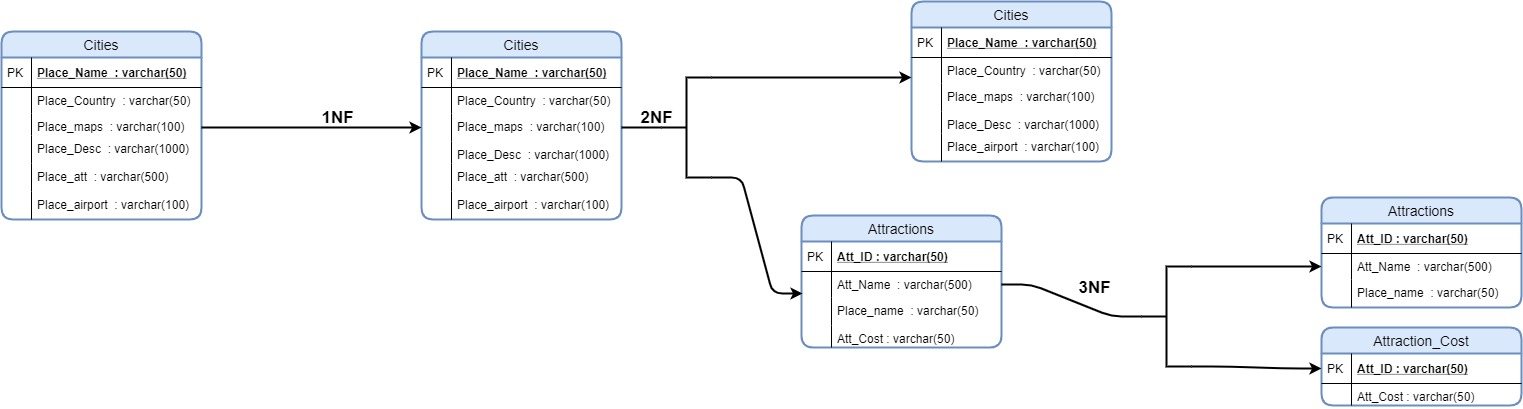

In [107]:
from IPython.display import Image
Image("C:/Users/Arjun/Documents/NEU/DMDD/Assignment 2/Cities.jpg")

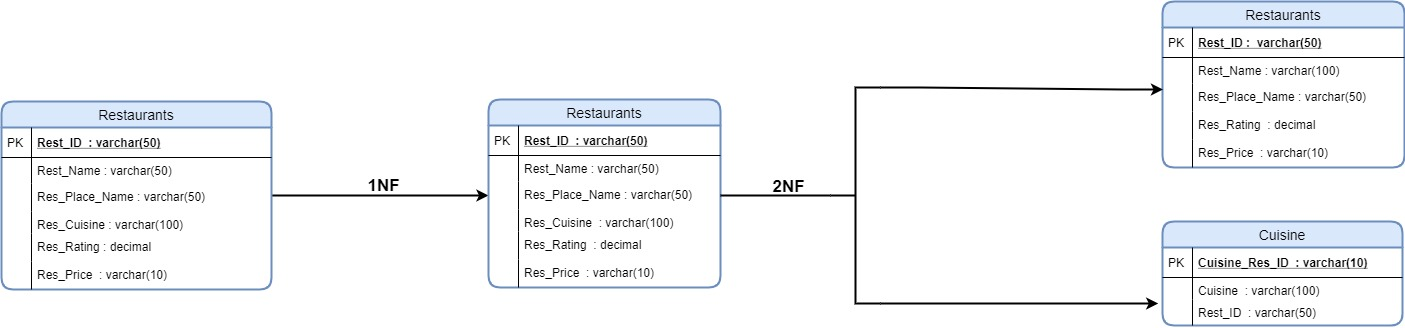

In [108]:
Image("C:/Users/Arjun/Documents/NEU/DMDD/Assignment 2/Restaurants_UML.jpg")

# ER Diagram

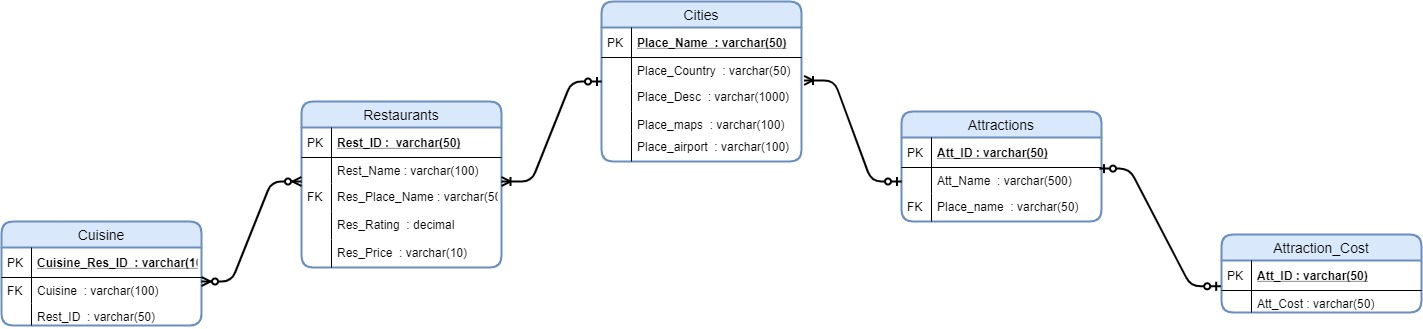

In [109]:
Image("C:/Users/Arjun/Documents/NEU/DMDD/Assignment 2/ERD.jpg")

### Questions you must answer about your conceptual model:
    
1. What are the ranges, data types and format of all of the attributes in your entities?

Ans. 
Cities:
1) place_name: varchar
2) place_country: varchar
3) place_maps: varchar
4) place_desc: varchar
5) place_airport: varchar
    
Attraction_Details: 
1) att_id: int
2) att_name: varchar
3) place_name: varchar

Attraction_Cost:
1) att_id: int
2) att_cost: varchar

Restaurant:
1) res_id: int
2) res_name: varchar
3) place_name: varchar
4) res_rating: int
5) res_price: varchar

Cuisine:
1) cuisine_res_id: int
2) cuisine: varchar
3) res_id: int


2. When should you use an entity versus attribute? (Example: address of a person could be
modeled as either)

Ans. Entity is used to define a real world object or the subject for the attribute values. 
Attributes are values which describ the stated entity and gives us information about the entity.
In this project, entities are the place names, restaurants and attractions. The other fields are attributes to these entities.

3. When should you use an entity or relationship, and placement of attributes? (Example: a
manager could be modeled as either)

Ans. Entity should be used as the primary key or the primary subject of a table. 
Relationships are formed when there is a dependency between 2 entities. 
In the example of a Manager, Manager is related to an employee in a table where employee is the entity but in a manager table, the Manager will be considered the entity and the employee woud be a relationship.
In ths project, the place_name and the restaurant are interchangebaly the entity and the relationship.

4. How did you choose your keys? Which are unique?

Ans. The keys were chosen by looking at which field could uniquely identify the records in the table. This could be in the form of primary or composite keys.
Foreign keys were set to link one table to the primary key of another table. Place_name is a primary key in the cities table and is used as a foreign key in the restaurant and attractions tables.

5. Did you model hierarchies using the “ISA” design element? Why or why not?

Ans. Our data has been structered based on a simple hierarchy. The restaurants and attractions tables inherits the city details from the cities table.

6. Were there design alternatives? What are their tradeoffs: entity vs. attribute, entity vs. relationship, binary vs. ternary relationships?

Ans. There were no design alternatives because based on the extracted data, the attractions dataset and restaurants dataset could only be linked through cities dataset.

7. Where are you going find real-world data populate your model?

Ans. Real world data was found using APIs and web-scraping in the previous assignment. The NF procedures were applied on the data extracted in Assignment 1.


### Questions you must answer about your physical model:

1. Are all the tables in 1NF?

Ans. Yes all the data in each of the tables in the physical model are in 1NF form as all the data are atomic in nature.

2. Are all the tables in 2NF?

Ans. All the tables in the physical model are in 2NF because the data in each of the tables do not have any partial dependency.

3. Are all the tables in 3NF?

Ans. All physical models are in 3NF because any transitive dependencies were taken care off by slpitting tables accordingly.

# Report

files used: restaurants.csv, places.csv
files renerated: attraction_cost.csv, attraction_details.csv, cities.csv, cuisine.csv, restaurant.csv
    
Data can been reformatted to fit the design conceptualized for the database and its components.

Code explained:
    1. Importing places.csv
        Pandas created to store cities dataset
        1NF performed due to multiple values in cells of city attractions
        2NF performed to split attraction details and city details
        3NF performed to split attraction cost and attraction details
    2. Importing restaurants.csv
        Pandas created to store restaurant dataset
        1NF done due to multiple values in the cuisine column
        2NF done to split the types of cuisine and restaurant details in order to avoid the primary key repetition.
        



# Conclusion

It was noticed that the data imported was not structured in an efficient manner. NF operations were necessary to optiize the structure. 
Cities dataset was too large and lacked atomicity of data. 1NF operations solved this problem. We also separated the dataset using 2NF to hold attarction details and city details in different dataframes in order to allow for updation of attraction and city details independently.
Cost for the attraction is an attribute that can be changed and to facilitate this without affecting the attraction details, 3NF was done.

Resturants dataset was also not atomic. Multiple cuisine values are in the same cell and this required 1NF transformations. Since this created a repetition of primary key in the transformed dataframe, 2NF was implemented to counter this and restaurant details was seperated from cuisines.


# Contribution

Your contribution towards project. How much code did you write and how much you took from other site or some other source

I contributed By Own: 40%

By External source: 60%

# Citations

Sources from where you have gained knowledge or used codes, data. It may include Web links, github links, code taken from somewhere etc.

https://www.geeksforgeeks.org/python-replace-multiple-characters-at-once/
https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e
https://stackoverflow.com/questions/54367361/how-to-assign-random-values-from-a-list-to-a-column-in-a-pandas-dataframe
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/
https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns

# GitHub Links

Nikhil Nijhawan: https://github.com/nikhil-nijhawan/DMDD-INFO6210-Assignment2

Arjun Acharya: https://github.com/ArjunAcharya0311/INFO6210_08_Assignment_2

Sumedha Hunagund: https://github.com/Sumedha1496/6210_08_A_2

# License

Copyright 2019 Sumedha Hunagund, Nikhil Nijhawan, Arjun Acharya

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.